<a href="https://colab.research.google.com/github/Aftabgazali/Google-Stock-Price-Prediction-Using-RNN/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df_train=pd.read_csv('Google_Stock_Price_Train.csv')
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
train_set=df_train.iloc[:,1:2].values
train_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

## Feature Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
train_set_scale=sc.fit_transform(train_set)
train_set_scale

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

## Data Preprocessing

In [9]:
X_train=[]
y_train=[]
for i in range(60,1258):
  X_train.append(train_set_scale[i-60:i,0])
  y_train.append(train_set_scale[i,0])

In [11]:
X_train, y_train=np.array(X_train), np.array(y_train)

In [14]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

## Building the RNN

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [16]:
reg=Sequential()
reg.add(LSTM(units= 50,return_sequences=True,input_shape=(X_train.shape[1],1)))
reg.add(Dropout(0.2))

In [17]:
## Adding second LSTM Layer
reg.add(LSTM(units= 50,return_sequences=True))
reg.add(Dropout(0.2))

In [18]:
## Adding Third LSTM Layer
reg.add(LSTM(units= 50,return_sequences=True))
reg.add(Dropout(0.2))

In [19]:
## Last LSTM Layer
reg.add(LSTM(units= 50,return_sequences=False))
reg.add(Dropout(0.2))

In [20]:
## Adding Output layer
reg.add(Dense(units=1))

In [21]:
reg.compile(optimizer='adam',loss='mean_squared_error')

In [22]:
reg.fit(X_train,y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 10s 114ms/step - loss: 0.0992
Epoch 2/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0080
Epoch 3/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0055
Epoch 6/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0042
Epoch 8/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0043
Epoch 13/100

## Test data

In [24]:
test_data=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=test_data.iloc[:,1:2].values

In [26]:
dataset_total=pd.concat((df_train['Open'],test_data['Open']),axis=0)
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [29]:
inputs=dataset_total[len(dataset_total)-len(test_data)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [30]:
X_test=[]
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)

In [34]:
X_test=np.reshape(X_test,((X_test.shape[0],X_test.shape[1],1)))

In [38]:
predicted=reg.predict(X_test)
predicted=sc.inverse_transform(predicted)
predicted

array([[784.03314],
       [781.034  ],
       [780.51404],
       [781.7417 ],
       [784.98566],
       [790.5779 ],
       [796.1304 ],
       [798.9039 ],
       [799.3932 ],
       [799.034  ],
       [798.848  ],
       [798.9603 ],
       [799.18066],
       [799.7641 ],
       [800.5445 ],
       [804.19745],
       [810.45355],
       [817.7465 ],
       [822.37726],
       [819.56635]], dtype=float32)

## Visualiztion

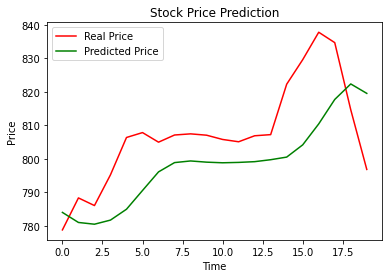

In [44]:
plt.plot(real_stock_price, color='r',label='Real Price')
plt.plot(predicted,color='g',label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()